In [20]:
%matplotlib inline

In [83]:
from astropy.table import Table
from scipy.stats import ks_2samp
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.gridspec import GridSpec

The Null hypothesis for the 2 sample KS test is that the two distributions are the same. 

If the K-S statistic is small or the p-value is high, then we cannot
reject the hypothesis that the distributions of the two samples
are the same.

Conversely, if the K-S statistic is large or the p-value is low, then we can reject the hypothesis that the two samples are the same (i.e., we conclude that the two samples are different).

In this case, we get a very low p value (<<1%) for both the Mass and the SFR comparison.

In [22]:
allmass = Table.read('all_masses.txt',format='ascii.fast_no_header')['col1']
hostmass = Table.read('host_masses.txt',format='ascii.fast_no_header')['col1']
allsfr = Table.read('all_sfrs.txt',format='ascii.fast_no_header')['col1']
hostsfr = Table.read('host_sfrs.txt',format='ascii.fast_no_header')['col1']

In [41]:
mass_stat, mass_pval = ks_2samp(allmass, hostmass)
sfr_stat, sfr_pval = ks_2samp(allsfr, hostsfr)

Text(0.05, 0.85, 'p-val=4.50e-09')

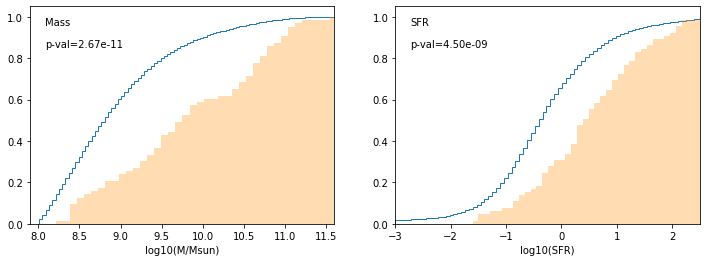

In [48]:
fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(1,2,1)
n_bins=100
n, bins, patches = ax.hist(allmass, n_bins, density=True, histtype='step',
                            cumulative=True, label='All Masses')

n_bins=40
n, bins, patches = ax.hist(hostmass, n_bins, density=True, histtype='stepfilled',
                           cumulative=True, label='Host Masses', color='darkorange', alpha=0.3)
ax.set_xlabel('log10(M/Msun)')
ax.set_xlim(7.9, 11.6)

ax.text(0.05,0.95,'Mass', ha='left', va='top', transform=ax.transAxes)
ax.text(0.05,0.85,'p-val={:.2e}'.format(mass_pval), ha='left', va='top', transform=ax.transAxes)


ax2 = fig.add_subplot(1,2,2)
n_bins=100
n, bins, patches = ax2.hist(allsfr, n_bins, density=True, histtype='step',
                            cumulative=True, label='All Masses')

n_bins=40
n, bins, patches = ax2.hist(hostsfr, n_bins, density=True, histtype='stepfilled',
                           cumulative=True, label='Host Masses', color='darkorange', alpha=0.3)
ax2.set_xlabel('log10(SFR)')
ax2.set_xlim(-3,2.5)
ax2.text(0.05,0.95,'SFR', ha='left', va='top', transform=ax2.transAxes)
ax2.text(0.05,0.85,'p-val={:.2e}'.format(sfr_pval), ha='left', va='top', transform=ax2.transAxes)


In [67]:
# read in a stand-in for the true SN host galaxy catalog
candelscat = Table.read("candels_hostlib.txt", format='ascii.basic')
hstsncat = Table.read("HSTSN_sample.txt", format='ascii.commented_header')
hstsnhosts = Table.read("HSTSN_sample_nearby_galaxies.txt", format='ascii.commented_header')

In [78]:
def plot_hexbin_scatter(ax, xval, yval, imark=None, xlabel='x values', ylabel='y values'):
    """Plot yval vs xval as a combined hexbin and scatter plot, highlighting in red 
    the galaxies that are unusually large"""
    ax.plot(xval, yval, color='k', ms=2, marker='.', ls=' ', zorder=-10)
    hexbinout = ax.hexbin(xval, yval, gridsize=50, cmap=cm.Greys_r, mincnt=20, zorder=10)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if imark is not None:
        ax.plot(xval[imark], yval[imark], color='r', ms=3, 
                marker='.', ls=' ', zorder=10)
    return(hexbinout)


/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/local/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


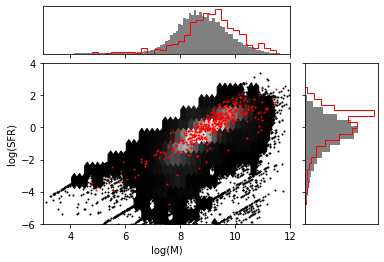

In [99]:
fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1:4,3], sharey=ax_joint)


plot_hexbin_scatter(ax_joint, candelscat['logmass'], candelscat['logsfr'], xlabel='log(M)', ylabel='log(SFR)')
ax_joint.plot(np.log10(hstsnhosts['mass']), np.log10(hstsnhosts['SFR']), 
              color='r', marker='.', ls=' ', zorder=100, ms=2)
ax_joint.set_xlim(3, 12)
ax_joint.set_ylim(-6, 4)

histout1a = ax_marg_x.hist(candelscat['logmass'], color='0.5', bins=100, density=True)
histout1b = ax_marg_x.hist(np.log10(hstsnhosts['mass']), color='r', bins=30, density=True, histtype='step')

histout2a = ax_marg_y.hist(candelscat['logsfr'], color='0.5', bins=100, density=True, orientation='horizontal')
histout2b = ax_marg_y.hist(np.log10(hstsnhosts['SFR']), color='r', bins=20, density=True, histtype='step', orientation='horizontal')

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

ax_marg_x.set_yticks([])
ax_marg_y.set_xticks([])